In [3]:
import warnings
warnings.filterwarnings("ignore")

#Importing the Data
import pandas as pd
import re
import csv
from sklearn.model_selection import train_test_split
data = pd.read_csv("data/77_cancer_proteomes_CPTAC_itraq.csv",header=0,index_col=0)
clinical = pd.read_csv("data/clinical_data_breast_cancer.csv",header=0,index_col=0)
#Manipulation
clinical.columns = [c.replace(' ', '_') for c in clinical.columns]
data.columns = [c.replace(' ', '_') for c in data.columns]

clinical.rename(columns = {'Tumor--T1_Coded':'T1_Coded'}, inplace = True)
clinical.rename(columns = {'Node-Coded':'Node_Coded'}, inplace = True)
clinical.rename(columns = {'Metastasis-Coded':'Metastasis_Coded'}, inplace = True)
clinical.rename(columns = {'Integrated_Clusters_(with_PAM50)':'Integrated_Clusters_with_PAM50'}, inplace = True)
clinical.rename(columns = {'Integrated_Clusters_(no_exp)':'Integrated_Clusters_no_exp'}, inplace = True)
clinical.rename(columns = {'Integrated_Clusters_(unsup_exp)':'Integrated_Clusters_unsup_exp'}, inplace = True)

clinical.Gender[clinical.Gender == 'MALE'] = 0
clinical.Gender[clinical.Gender == 'FEMALE'] = 1

clinical.ER_Status[clinical.ER_Status == 'Positive'] = 1
clinical.ER_Status[clinical.ER_Status == 'Negative'] = 0

clinical.PR_Status[clinical.PR_Status == 'Positive'] = 1
clinical.PR_Status[clinical.PR_Status == 'Negative'] = 0

clinical.HER2_Final_Status[clinical.HER2_Final_Status == 'Positive'] = 1
clinical.HER2_Final_Status[clinical.HER2_Final_Status == 'Negative'] = 0

clinical.Tumor[clinical.Tumor == 'T1'] = 1
clinical.Tumor[clinical.Tumor == 'T2'] = 2
clinical.Tumor[clinical.Tumor == 'T3'] = 3
clinical.Tumor[clinical.Tumor == 'T4'] = 4

clinical.T1_Coded[clinical.T1_Coded == 'T1'] = 1
clinical.T1_Coded[clinical.T1_Coded == 'T_Other'] = 0

clinical.Node[clinical.Node == 'N0'] = 0
clinical.Node[clinical.Node == 'N1'] = 1
clinical.Node[clinical.Node == 'N2'] = 2
clinical.Node[clinical.Node == 'N3'] = 3

clinical.Node_Coded[clinical.Node_Coded == 'Positive'] = 1
clinical.Node_Coded[clinical.Node_Coded == 'Negative'] = 0

clinical.Metastasis[clinical.Metastasis == 'M0'] = 0
clinical.Metastasis[clinical.Metastasis == 'M1'] = 1
clinical.Metastasis_Coded[clinical.Metastasis_Coded == 'Positive'] = 1
clinical.Metastasis_Coded[clinical.Metastasis_Coded == 'Negative'] = 0

clinical.AJCC_Stage[clinical.AJCC_Stage == 'Stage I'] = 1
clinical.AJCC_Stage[clinical.AJCC_Stage == 'Stage IA'] = 11
clinical.AJCC_Stage[clinical.AJCC_Stage == 'Stage IB'] = 12
clinical.AJCC_Stage[clinical.AJCC_Stage == 'Stage II'] = 2
clinical.AJCC_Stage[clinical.AJCC_Stage == 'Stage IIA'] = 21
clinical.AJCC_Stage[clinical.AJCC_Stage == 'Stage IIB'] = 22
clinical.AJCC_Stage[clinical.AJCC_Stage == 'Stage III'] = 3
clinical.AJCC_Stage[clinical.AJCC_Stage == 'Stage IIIA'] = 31
clinical.AJCC_Stage[clinical.AJCC_Stage == 'Stage IIIB'] = 32
clinical.AJCC_Stage[clinical.AJCC_Stage == 'Stage IIIC'] = 33
clinical.AJCC_Stage[clinical.AJCC_Stage == 'Stage IV'] = 4

clinical.Converted_Stage[clinical.Converted_Stage == 'No_Conversion'] = 0
clinical.Converted_Stage[clinical.Converted_Stage == 'Stage I'] = 1
clinical.Converted_Stage[clinical.Converted_Stage == 'Stage IIA'] = 21
clinical.Converted_Stage[clinical.Converted_Stage == 'Stage IIB'] = 22
clinical.Converted_Stage[clinical.Converted_Stage == 'Stage IIIA'] = 31
clinical.Converted_Stage[clinical.Converted_Stage == 'Stage IIIB'] = 32
clinical.Converted_Stage[clinical.Converted_Stage == 'Stage IIIC'] = 33

clinical.Survival_Data_Form[clinical.Survival_Data_Form == 'enrollment'] = 1
clinical.Survival_Data_Form[clinical.Survival_Data_Form == 'followup'] = 1

clinical.Vital_Status[clinical.Vital_Status == 'LIVING'] = 0
clinical.Vital_Status[clinical.Vital_Status == 'DECEASED'] = 1

clinical.PAM50_mRNA[clinical.PAM50_mRNA == 'Luminal A'] = 1
clinical.PAM50_mRNA[clinical.PAM50_mRNA == 'Luminal B'] = 2
clinical.PAM50_mRNA[clinical.PAM50_mRNA == 'Basal-like'] = 3
clinical.PAM50_mRNA[clinical.PAM50_mRNA == 'HER2-enriched'] = 4

clinical.RPPA_Clusters[clinical.RPPA_Clusters == 'Basal'] = 1
clinical.RPPA_Clusters[clinical.RPPA_Clusters == 'LumA/B'] = 2
clinical.RPPA_Clusters[clinical.RPPA_Clusters == 'Her2'] = 3
clinical.RPPA_Clusters[clinical.RPPA_Clusters == 'ReacI'] = 4
clinical.RPPA_Clusters[clinical.RPPA_Clusters == 'ReacII'] = 5
clinical.RPPA_Clusters[clinical.RPPA_Clusters == 'LumA'] = 6
clinical.RPPA_Clusters[clinical.RPPA_Clusters == 'X'] = 7

#for col in clinical.columns: 
    #print(col)

In [2]:
#import pip
#pip.main(['install', 'scikit-multilearn'])

In [4]:
## Change the protein data sample names to a format matching the clinical data set
data.rename(columns=lambda x: "TCGA-%s" % (re.split('[_|-|.]',x)[0]) if bool(re.search("TCGA",x)) is True else x,inplace=True)
 
## Transpose data for the clustering algorithm since we want to divide patient samples, not proteins
data = data.transpose()
 
## Drop clinical entries for samples not in our protein data set
clinical = clinical.loc[[x for x in clinical.index.tolist() if x in data.index],:]
 
## Add clinical meta data to our protein data set, note: all numerical features for analysis start with NP_ or XP_
merged = data.merge(clinical,left_index=True,right_index=True)

print(merged.shape)

(80, 12582)


In [5]:
#Lots of NaN values so drop columns instead of rows because otherwise we would end up with 0 rows
merged = merged.dropna(axis='columns')
merged.shape

(80, 8045)

In [6]:
#Subsetting the equivocal data and looking at variable counts once again
merged = merged[merged["HER2_Final_Status"] != "Equivocal"]
merged.groupby(["ER_Status", "PR_Status", "HER2_Final_Status"]).size()

ER_Status  PR_Status  HER2_Final_Status
0          0          0                    19
                      1                     7
1          0          0                     6
                      1                     4
           1          0                    35
                      1                     8
dtype: int64

In [39]:
y_col = ["ER_Status","PR_Status","HER2_Final_Status"]
y = merged[y_col]
X = merged.drop(y_col, axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

x_train.shape


(63, 8042)

In [9]:
merged.isnull().values.any()

False

In [41]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.metrics import accuracy_score

#Find optimal k
k_values = list(range(1,50))
k_accuracy = []

x_train = x_train.astype(float).round(6)
y_train = y_train.astype(float).round(6)
x_test = x_test.astype(float).round(6)
y_test = y_test.astype(float).round(6)

# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

for i in k_values:
    n_neighbors = i
    classifier_new = MLkNN(n_neighbors)
    classifier_new.fit(x_train, y_train)
    predictions_new = classifier_new.predict(x_test)
    score = accuracy_score(y_test,predictions_new)
    k_accuracy.append(score)

print(k_accuracy)

[0.375, 0.4375, 0.375, 0.4375, 0.3125, 0.5, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.3125, 0.3125, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.3125, 0.375, 0.375, 0.375, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.375, 0.3125, 0.3125, 0.3125, 0.3125, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375]


In [35]:
from sklearn.metrics import classification_report

classifier_new = MLkNN(k=6)
classifier_new.fit(x_train, y_train)
predictions_new = classifier_new.predict(x_test)


print(classification_report(y_test, predictions_new, target_names=y.columns))

                   precision    recall  f1-score   support

        ER_Status       0.67      1.00      0.80        10
        PR_Status       0.50      0.86      0.63         7
HER2_Final_Status       1.00      0.50      0.67         6

        micro avg       0.63      0.83      0.72        23
        macro avg       0.72      0.79      0.70        23
     weighted avg       0.70      0.83      0.71        23
      samples avg       0.61      0.67      0.62        23



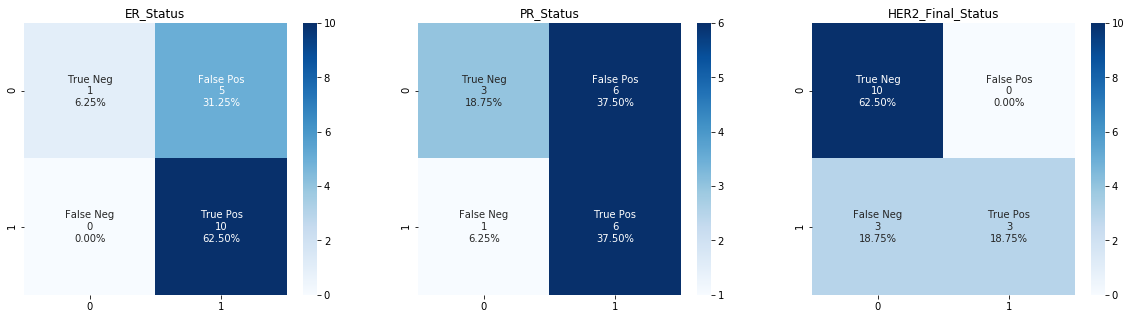

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#predictions_new = predictions_new.toarray()
#y_test = y_test.to_numpy()

labels = y.columns.values

conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_test[:, label_col]
    y_pred_label = predictions_new[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat_dict[labels[0]].flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat_dict[labels[0]].flatten()/np.sum(conf_mat_dict[labels[0]])]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
label = np.asarray(label).reshape(2,2)
sns.heatmap(conf_mat_dict[labels[0]], ax=ax1, annot=label, fmt='', cmap='Blues').set_title(labels[0])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat_dict[labels[1]].flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat_dict[labels[1]].flatten()/np.sum(conf_mat_dict[labels[1]])]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
label = np.asarray(label).reshape(2,2)
sns.heatmap(conf_mat_dict[labels[1]], ax=ax2, annot=label, fmt='', cmap='Blues').set_title(labels[1])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat_dict[labels[2]].flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat_dict[labels[2]].flatten()/np.sum(conf_mat_dict[labels[2]])]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
label = np.asarray(label).reshape(2,2)
sns.heatmap(conf_mat_dict[labels[2]], ax=ax3, annot=label, fmt='', cmap='Blues').set_title(labels[2])

plt.show()

In [18]:
#Apply feature selection using mutual information
from sklearn.feature_selection import mutual_info_classif

y = y.astype('int')
X = X.astype('float')

y_1 = y.iloc[:,0]
y_2 = y.iloc[:,1]
y_3 = y.iloc[:,2]

mi1 = mutual_info_classif(X,y_1)
mi2 = mutual_info_classif(X,y_2)
mi3 = mutual_info_classif(X,y_3)

In [63]:
import numpy as np

feat = 2000

ind1 = np.argpartition(mi1, -feat)[-feat:]
ind2 = np.argpartition(mi2, -feat)[-feat:]
ind3 = np.argpartition(mi3, -feat)[-feat:]

ind1 = ind1.tolist()
ind2 = ind2.tolist()
ind3 = ind3.tolist()


resulting_list = list(ind1)
resulting_list.extend(x for x in ind2 if x not in resulting_list)
resulting_list.extend(x for x in ind3 if x not in resulting_list)

print(resulting_list)

[6042, 6043, 6044, 6045, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102, 6103, 6104, 6105, 6106, 6107, 6108, 6109, 6110, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6119, 6120, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177, 6178, 6179, 6180, 6181, 6182, 6183, 6184, 6185, 6186, 6187, 6188, 6189, 6190, 6191, 6192, 6193, 6194, 6195, 6196, 6197, 6198, 6199, 6200, 6201, 6202, 6203, 6204, 6205, 6206, 6207, 620

In [64]:
#New ML-kNN with feature selected by mutual information
X_new = X.iloc[:,resulting_list]
X_new.shape

(79, 4663)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

#Find optimal k
k_values = list(range(1,50))
k_accuracy = []

x_train = x_train.astype(float).round(6)
y_train = y_train.astype(float).round(6)
x_test = x_test.astype(float).round(6)
y_test = y_test.astype(float).round(6)

# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

for i in k_values:
    n_neighbors = i
    classifier_new = MLkNN(n_neighbors)
    classifier_new.fit(x_train, y_train)
    predictions_new = classifier_new.predict(x_test)
    score = accuracy_score(y_test,predictions_new)
    k_accuracy.append(score)

print(k_accuracy)

[0.3125, 0.25, 0.375, 0.4375, 0.3125, 0.4375, 0.5, 0.3125, 0.375, 0.375, 0.375, 0.375, 0.375, 0.3125, 0.3125, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.3125, 0.375, 0.375, 0.375, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.375, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.25, 0.3125, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375]


In [66]:
classifier_new = MLkNN(k=7)
classifier_new.fit(x_train, y_train)
predictions_new = classifier_new.predict(x_test)


print(classification_report(y_test, predictions_new, target_names=y.columns))

                   precision    recall  f1-score   support

        ER_Status       0.67      0.80      0.73        10
        PR_Status       0.50      1.00      0.67         7
HER2_Final_Status       0.75      0.50      0.60         6

        micro avg       0.60      0.78      0.68        23
        macro avg       0.64      0.77      0.66        23
     weighted avg       0.64      0.78      0.68        23
      samples avg       0.53      0.59      0.55        23



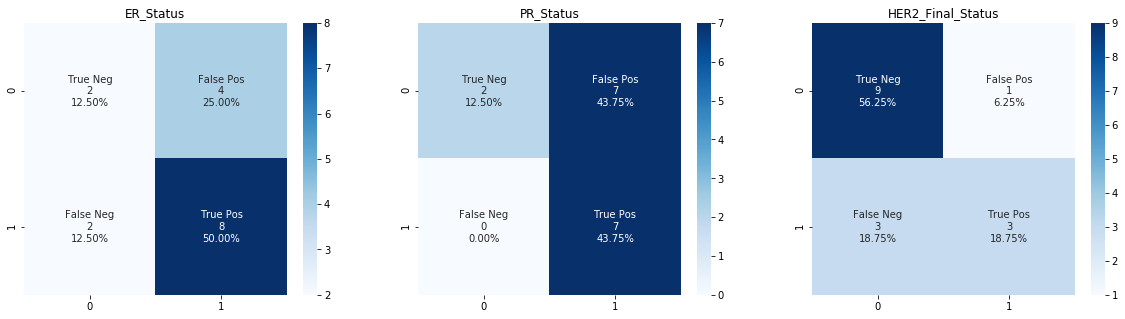

In [67]:
predictions_new = predictions_new.toarray()
y_test = y_test.to_numpy()

labels = y.columns.values

conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_test[:, label_col]
    y_pred_label = predictions_new[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat_dict[labels[0]].flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat_dict[labels[0]].flatten()/np.sum(conf_mat_dict[labels[0]])]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
label = np.asarray(label).reshape(2,2)
sns.heatmap(conf_mat_dict[labels[0]], ax=ax1, annot=label, fmt='', cmap='Blues').set_title(labels[0])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat_dict[labels[1]].flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat_dict[labels[1]].flatten()/np.sum(conf_mat_dict[labels[1]])]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
label = np.asarray(label).reshape(2,2)
sns.heatmap(conf_mat_dict[labels[1]], ax=ax2, annot=label, fmt='', cmap='Blues').set_title(labels[1])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat_dict[labels[2]].flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat_dict[labels[2]].flatten()/np.sum(conf_mat_dict[labels[2]])]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
label = np.asarray(label).reshape(2,2)
sns.heatmap(conf_mat_dict[labels[2]], ax=ax3, annot=label, fmt='', cmap='Blues').set_title(labels[2])

plt.show()